 ![alternatvie text](https://filkom.ub.ac.id/wp-content/uploads/2020/12/logo_filkom.png)

# <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:180%;text-align:center;border-radius:5px 5px;">Deteksi Buah Jeruk Menggunaakan SVM</p>

### <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:180%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENT</p>


### <p style="font-family:Palatino;text-align:right; 10px;font-size:80%">1. Mempersiapkan Data</p>
### <p style="font-family:Palatino;text-align:center; 10px;font-size:80%;">2. Exploratory Data Analysis</p>
### <p style="font-family:Palatino;text-align:center; 10px;font-size:80%;">3. Data Preprocessing/Transformation</p>
### <p style="font-family:Palatino;text-align:center;10px;font-size:80%">4. Data Modeling</p>
### <p style="font-family:Palatino;text-align:center; 10px;font-size:80%">5. Evaluasi</p>
### <p style="font-family:Palatino;text-align:center; 10px;font-size:80%">6. Deployment</p>
                     
                        
                        


## <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:center;border-radius:5px 5px;">1. Mempersiapkan Data</p>

 ### <b> Import library yang diperlukan</b>

In [1]:
# Basic Library
import warnings
import numpy as np
import pandas as pd

# Machine Learning Library
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns

# Dimentionality Reduction & Normalization Library
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Model Evaluation Library
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

 ### <b> Import Dataset yang Akan Digunakan </b>

In [2]:
df = pd.read_excel('buahcoba.xlsx')

 ### <b> Cek Missing Value </b>

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

R        0
G        0
B        0
S        0
K        0
Kelas    0
dtype: int64


##   <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:center;border-radius:5px 5px;">2. Exploratory Data Analysis (EDA)</p>

In [4]:
df

,R,G,B,S,K,Kelas
0,73,84,80,29.1,86.0,Bukan Jeruk
1,73,84,79,29.1,88.0,Bukan Jeruk
2,73,84,79,29.1,88.0,Bukan Jeruk
3,73,84,80,29.1,88.0,Bukan Jeruk
4,73,84,79,29.1,88.0,Bukan Jeruk
...,...,...,...,...,...,...
178,63,91,80,29.1,85.0,Jeruk
179,63,92,80,29.3,84.0,Jeruk
180,63,92,80,29.3,84.0,Jeruk
181,63,92,80,29.3,84.0,Jeruk


In [5]:
#mengetahui jumlah kelas pada grade susu
class_count = df['Kelas'].unique()
print(class_count)

['Bukan Jeruk' 'Jeruk']


  ### <b> Detect Outlier</b>


<Axes: >

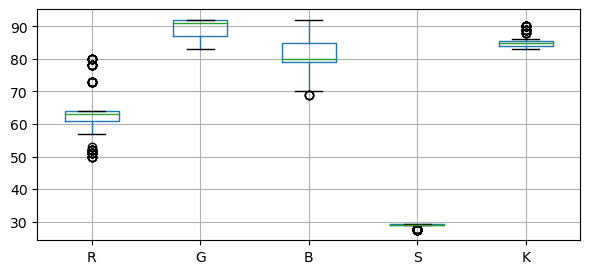

In [6]:
plt.figure(figsize=(7,3))
df.boxplot()

In [7]:
def detect_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3-Q1
    return df[(df[x] < Q1-1.5*IQR) | (df[x] > Q3+1.5*IQR)]

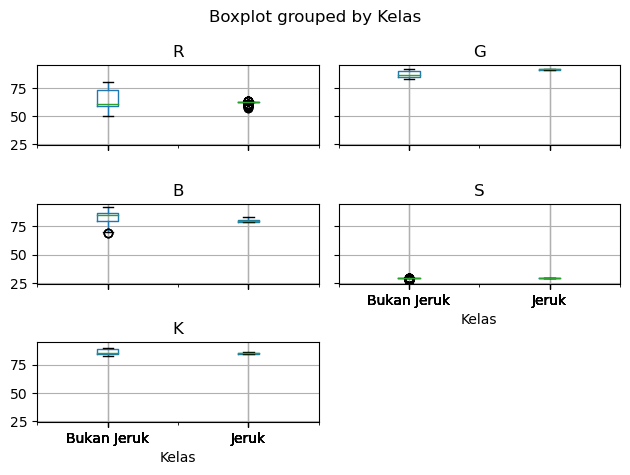

In [8]:
df.boxplot(column=['R',  'G', 'B', 'S','K'], by='Kelas')

plt.tight_layout()

  ### <b>Check Data Skew</b>


Berguna untuk meningkatkan kinerja model klasifikasi. Skewness mengacu pada asimetri distribusi variabel, dan mengurangi skewness bertujuan untuk membuat distribusi lebih simetris.

In [9]:
warnings.filterwarnings("ignore", category=FutureWarning)
df.skew()

R    0.656242
G   -0.975395
B   -0.019637
S   -2.276379
K    1.306607
dtype: float64

### <b> Skewness Reduction </b>

In [10]:
quantile1=df["S"].quantile(0.25)
quantile2=df["S"].quantile(0.75)

df["S"]=np.where(df["S"]<quantile1,quantile1,df["S"])
df["S"]=np.where(df["S"]>quantile2,quantile2,df["S"])

In [11]:
t = round(df['S'].skew(),10)
print(t)

0.3208625614


In [12]:
quantile1=df["K"].quantile(0.25)
quantile2=df["K"].quantile(0.75)

df["K"]=np.where(df["K"]<quantile1,quantile1,df["K"])
df["K"]=np.where(df["K"]>quantile2,quantile2,df["K"])

In [13]:
t = round(df['K'].skew(),10)
print(t)

-0.5692353167


In [14]:
df.skew()

R    0.656242
G   -0.975395
B   -0.019637
S    0.320863
K   -0.569235
dtype: float64

  ### <b> Correlation</b>


Fungsi korelasi mengukur sejauh mana dua variabel terkait atau bergerak bersama. Korelasi menunjukkan kekuatan dan arah hubungan antara dua variabel, apakah positif (seiring naik) atau negatif (seiring turun).

In [15]:
correlation = df.corr()
correlation

,R,G,B,S,K
R,1.000000,-0.471315,-0.870784,-0.138806,0.711075
G,-0.471315,1.000000,0.000910,0.524442,-0.465227
B,-0.870784,0.000910,1.000000,-0.159568,-0.551780
S,-0.138806,0.524442,-0.159568,1.000000,-0.225798
K,0.711075,-0.465227,-0.551780,-0.225798,1.000000


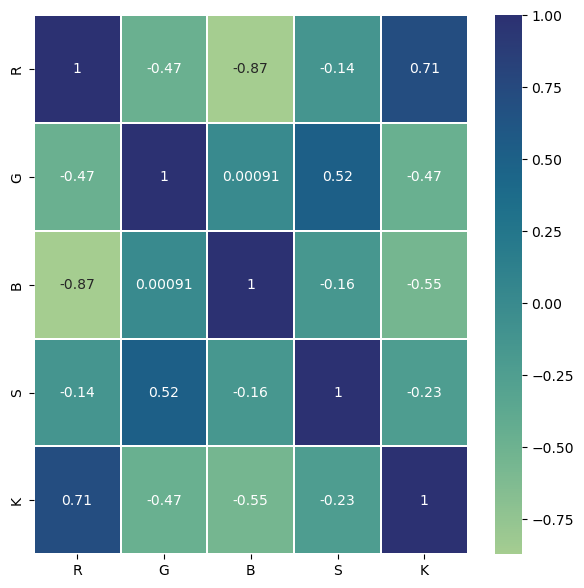

In [16]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True,cmap='crest',linewidths=0.2)
plt.show()

  ### <b> Feature Importance</b>


Feature Importance adalah metode yang digunakan untuk mengevaluasi kontribusi atau pengaruh masing-masing fitur (variabel) terhadap hasil atau target 
dalam suatu model. Fungsi ini memberikan informasi tentang sejauh mana setiap fitur 
mempengaruhi prediksi atau output model.

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

X_ft = df.loc[:, ['R', 'G', 'B', 'S','K']]
y_ft = df.loc[:, 'Kelas']

model = ExtraTreesClassifier()
model.fit(X_ft, y_ft)

ExtraTreesClassifier()

In [18]:
print(model.feature_importances_)

[0.14940237 0.28918034 0.21593077 0.25516805 0.09031846]


<Axes: >

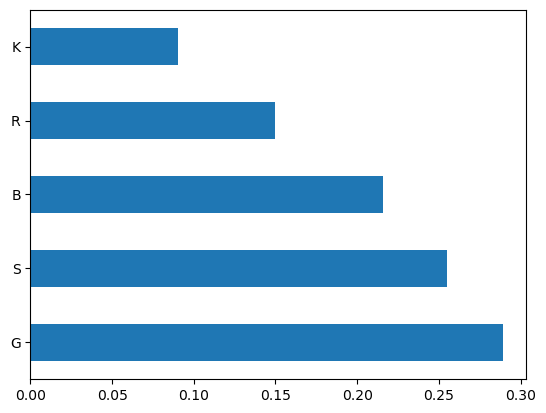

In [19]:
feat_importances = pd.Series(model.feature_importances_, index=X_ft.columns)
feat_importances.nlargest(10).plot(kind='barh')

##    <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:center;border-radius:5px 5px;">3. Data Pre-Processing/Transformation  </p>

  ### <b> Splitting the Data</b>


In [20]:
# Create x (Features matrix)
x = df.drop ("Kelas", axis=1)
# Create y (label)
y = df['Kelas']

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# View the data shapes
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((146, 5), (37, 5), (146,), (37,))

### MinMax Scaler (Normalisasi)

In [22]:
scaler = MinMaxScaler()
scaler.fit(x_train)  
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [23]:
x_test_scaled

array([[0.76666667, 0.11111111, 0.43478261, 0.        , 1.        ],
       [0.93333333, 0.88888889, 0.04347826, 0.        , 1.        ],
       [0.03333333, 0.77777778, 0.95652174, 0.        , 0.        ],
       [0.3       , 1.        , 0.60869565, 1.        , 0.        ],
       [0.43333333, 0.88888889, 0.52173913, 1.        , 0.        ],
       [0.03333333, 0.77777778, 0.91304348, 0.        , 0.        ],
       [0.43333333, 0.88888889, 0.52173913, 0.        , 0.66666667],
       [1.        , 0.        , 0.2173913 , 0.        , 1.        ],
       [0.46666667, 1.        , 0.43478261, 1.        , 0.66666667],
       [0.23333333, 1.        , 0.60869565, 1.        , 0.        ],
       [0.26666667, 1.        , 0.60869565, 1.        , 0.        ],
       [0.76666667, 0.11111111, 0.43478261, 0.        , 1.        ],
       [0.76666667, 0.11111111, 0.47826087, 0.        , 1.        ],
       [0.43333333, 1.        , 0.47826087, 1.        , 0.        ],
       [0.43333333, 1.        , 0.

### PCA Dimentional Reduction

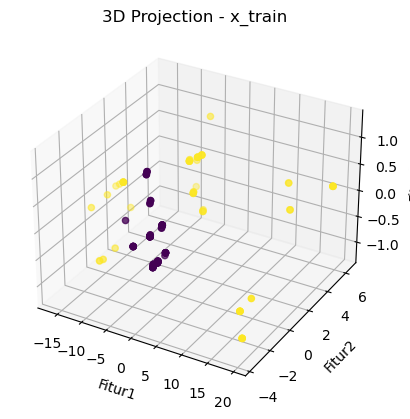

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Melakukan PCA dengan 3 komponen pada data latih
pca = PCA(n_components=3)
pca_x_train = pca.fit_transform(x_train)

# Membuat figure dan subplot 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

# Mengganti label kelas menjadi angka
y_train_numeric = pd.factorize(y_train)[0]

# Membuat proyeksi 3D dari data latih
ax.scatter3D(pca_x_train[:, 0], pca_x_train[:, 1], pca_x_train[:, 2], c=y_train_numeric)

# Menambahkan label pada sumbu x, y, dan z
ax.set_xlabel('Fitur1')
ax.set_ylabel('Fitur2')
ax.set_zlabel('Fitur3')

# Menampilkan plot proyeksi 3D
plt.title('3D Projection - x_train')
plt.show()


##    <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:center;border-radius:5px 5px;">4. Data Modeling </p>

 <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:left;margin:5px;border-radius:5px 5px;">SVM Classifier </p>

  ### <b>Model dengan Data Mentah</b>

In [25]:
warnings.filterwarnings('ignore')
clf_raw = LinearSVC(max_iter=1000)
clf_raw.fit(x_train, y_train)
clf_pred_raw = clf_raw.predict(x_test)

  ### <b>Model Dengan Data Normalisasi</b>


In [26]:
clf_minmax = LinearSVC(max_iter=1000)
clf_minmax.fit(x_train_scaled, y_train)
clf_pred_minmax = clf_minmax.predict(x_test_scaled) 

##     <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:center;border-radius:5px 5px;">5. Evaluasi Model  </p>

 <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:left;margin:5px;border-radius:5px 5px;">Evaluasi Model dengan Data Mentah </p>

  ### <b>Akurasi </b>


In [27]:
akurasi_raw = clf_raw.score(x_test, y_test)
print(akurasi_raw)

0.918918918918919


 ### <b>Confusion Matrix </b>

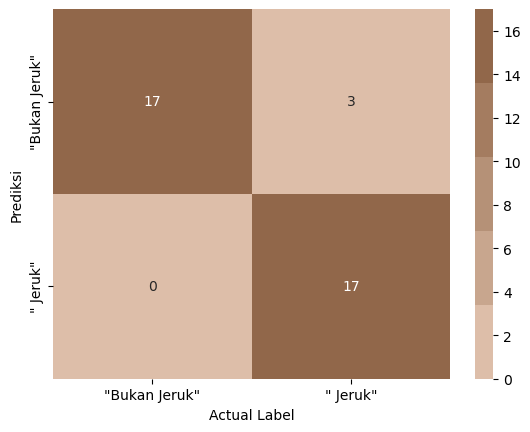

In [28]:
custom_palette = sns.color_palette(["#DDBEA9", "#C8A68E", "#B59177", "#A47C60", "#91674A"])  # Adjust the hex color codes as per your preference
results1 = confusion_matrix(y_test, clf_pred_raw)
ax = sns.heatmap(results1, annot=True, cmap=custom_palette, xticklabels=['"Bukan Jeruk"', '" Jeruk"'], yticklabels=['"Bukan Jeruk"', '" Jeruk"'])
ax.set(xlabel='Actual Label', ylabel='Prediksi')
plt.show()


 ### <b>Classification Report  </b>

In [29]:
print(classification_report(y_test, clf_pred_raw))

              precision    recall  f1-score   support

 Bukan Jeruk       1.00      0.85      0.92        20
       Jeruk       0.85      1.00      0.92        17

    accuracy                           0.92        37
   macro avg       0.93      0.93      0.92        37
weighted avg       0.93      0.92      0.92        37



 <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:left;margin:5px;border-radius:5px 5px;">Evaluasi Model  dengan Data Normalisasi </p>

### Akurasi 

In [30]:
akurasi_minmax = clf_minmax.score(x_test_scaled, y_test)
print(akurasi_minmax)

0.972972972972973


 ### <b>Confusion Matrix </b>

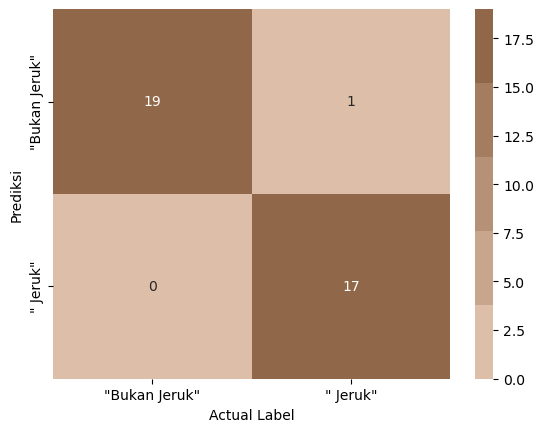

In [31]:
custom_palette = sns.color_palette(["#DDBEA9", "#C8A68E", "#B59177", "#A47C60", "#91674A"])  # Adjust the hex color codes as per your preference
results2 = confusion_matrix(y_test, clf_pred_minmax)
ax = sns.heatmap(results2, annot=True, cmap=custom_palette, xticklabels=['"Bukan Jeruk"', '" Jeruk"'], yticklabels=['"Bukan Jeruk"', '" Jeruk"'])
ax.set(xlabel='Actual Label', ylabel='Prediksi')
plt.show()


 ### <b>Classification Report  </b>

In [32]:
print(classification_report(y_test, clf_pred_minmax))

              precision    recall  f1-score   support

 Bukan Jeruk       1.00      0.95      0.97        20
       Jeruk       0.94      1.00      0.97        17

    accuracy                           0.97        37
   macro avg       0.97      0.97      0.97        37
weighted avg       0.97      0.97      0.97        37



##     <p style="background-color:#6a381f;font-family:Palatino;color:#ffffb3;font-size:150%;text-align:center;border-radius:5px 5px;">6. Deployment  </p>

### Save Model Menggunakan Pickle

In [33]:
import pickle
pickle.dump(clf_minmax, open ("Deteksibuah_minmax_SVC.pkl", "wb"))

### Convert Model ke format .ino

In [34]:
from microlearn.offloader import Offload
off = Offload(clf_minmax)
off.export_to_arduino('buah_minmax.ino')

### Hasil Convert ke Format .ino

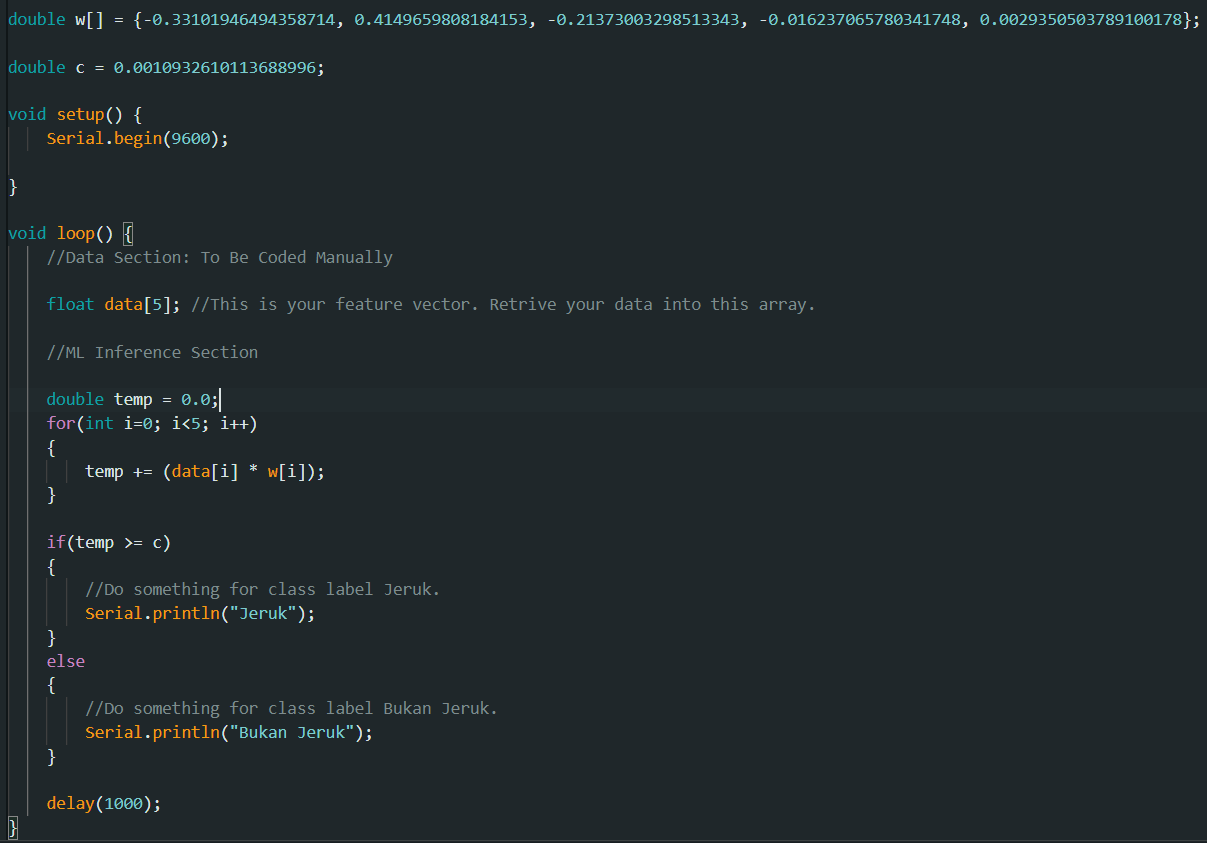